## Setup

In [20]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from helper_methods import run, plot

## Agent Implementation

In [104]:
class QLearningAgent:

    def __init__(self, env,number_bins):
        self.num_of_actions = env.action_space.n
        #self.state_space =
        self.env = env
        self.number_bins = number_bins
        
        self.q_table = {}
           
        
        # hyper parameters
        self.discount = 0.99 #gamma
        self.learning_rate = 0.2 #step size, alpha
        self.episodes = 100
        self.decrease_factor = 1/self.episodes
        
        
    def continous_to_discrete(self,continous,highest=600000000,lowest=0):
        bins = np.linspace(lowest,highest,num=self.number_bins)
        discrete = np.digitize(continous,bins)
        return discrete
    
    def run_all_episodes(self):
        all_states = []
        all_rewards = []
        epislon = 1 #at the start only explore
        
        for episode in range(self.episodes):
            states,rewards = self.run_episode(epislon)
            all_states.append(states)
            all_rewards.append(rewards)
            epislon -= self.decrease_factor #hyperparameter
            
        return all_states,all_rewards
    
    def run_episode(self,epislon):
        states = []
        rewards = []
        done = False
        
        
        state = self.env.reset()
        state = self.continous_to_discrete(state)
        self.q_table[tuple(state)] = [0,0,0,0]
        states.append(state)
        
        while not done:
            random_number = np.random.randint(0,1)
            if random_number < epislon:
                #explore
                action = np.random.choice(self.num_of_actions)
            else:
                #exploit
                action = self.get_action(state)
                
            new_state, reward, done, i = self.env.step(action=action) # Q-learning
            new_state = self.continous_to_discrete(new_state)
            self.q_table[tuple(new_state)] = [0,0,0,0]
            
            #update q table
            self.update_q_table(state,new_state,action,reward)
            
            states.append(state)
            rewards.append(reward)
            state = new_state
        return (states, rewards)
    
    def update_q_table(self,state,new_state,action,reward):
        #target
        #max of a' given the 
        max_a_prime = np.max(self.value_from_q(new_state))
        target = reward + (self.discount*max_a_prime)
        
        #compute difference
        difference = target - self.value_from_q(state)[action]
        
        #take a small step in the delta direction
        new_q = self.value_from_q(state)[action] + (self.learning_rate * difference)
        if tuple(state) in self.q_table:
            self.q_table[tuple(state)][action] = new_q
        else:
            self.q_table[tuple(state)] = [0,0,0,0]
            self.q_table[tuple(state)][action] = new_q
    
    def get_action(self,state):
        #exploit the q table
        if tuple(state) in self.q_table:
            action = np.argmax(self.q_table[tuple(state)])
        else:
            self.q_table[tuple(state)] = [0,0,0,0]
        
        return action

    def value_from_q(self,state):
        return self.q_table.get(tuple(state),[0,0,0,0])
    
            
            
    def get_action_text(self,action):
        action_texts = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
        return action_texts[action]
    
    def get_env(self):
        return env
    
    def get_chart_title(self):
        return "Title here"


## Analysis

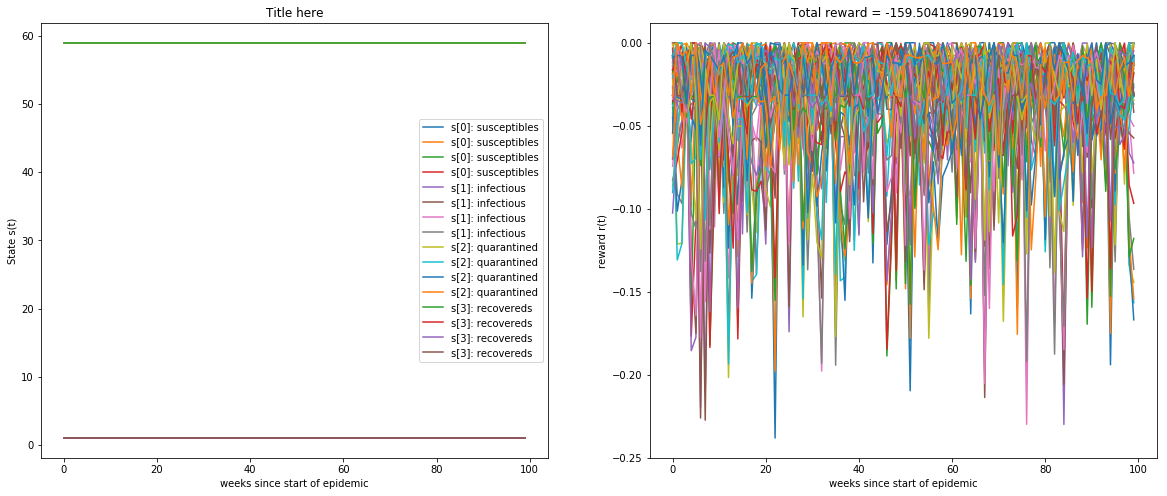

In [105]:
env = virl.Epidemic(stochastic=False, noisy=False)

agent = QLearningAgent(env,60)
states, rewards = agent.run_all_episodes()

plot(agent, states, rewards)

## Evaluation

Eval here